In [1]:
%matplotlib

import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

In [2]:
odi = pd.read_csv("ODI-2019-csv.csv", sep = ";")

In [3]:
odi.columns

Index(['Timestamp', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?',
       'What is your stress level (0-100)?'],
      dtype='object')

In [4]:
odi.head()

,Timestamp,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?,What is your stress level (0-100)?
0,3/27/2019 10:16:11,AI,yes,1,mu,ja,unknown,slim,unknown,3,no,100,6,23:00,sun,lecture,NaN
1,4/1/2019 15:58:21,AI,no,0,mu,ja,male,fat,09071992,1,no,0,7,3,DM,AI,1
2,4/1/2019 15:59:07,Computer Science,yes,1,unknown,ja,male,neither,04/08/95,0,unknown,0,0,0,0,0,100
3,4/1/2019 15:59:30,Econometrics,yes,1,mu,ja,male,fat,29-09-1993,2,no,42,"1,645","0,3",Winning,Food,0
4,4/1/2019 15:59:58,cs,no,1,mu,ja,male,neither,0212,2,no,second,66,20,kiss,love,100


In [5]:
# renaming header
odi.columns = ['Timestamp', 'Programme', 'ML?', 'Info Retrieval?', 'Stats?', 'Databases?', 'Gender', 'Chocolate makes you...', 'Bday', '# Neighbors', 'Standing', 'How much do you think you deserve?', 'Random #', 'Bedtime', 'Good Day 1', 'Good Day 2', 'Stress_Level']
odi.head()

,Timestamp,Programme,ML?,Info Retrieval?,Stats?,Databases?,Gender,Chocolate makes you...,Bday,# Neighbors,Standing,How much do you think you deserve?,Random #,Bedtime,Good Day 1,Good Day 2,Stress_Level
0,3/27/2019 10:16:11,AI,yes,1,mu,ja,unknown,slim,unknown,3,no,100,6,23:00,sun,lecture,NaN
1,4/1/2019 15:58:21,AI,no,0,mu,ja,male,fat,09071992,1,no,0,7,3,DM,AI,1
2,4/1/2019 15:59:07,Computer Science,yes,1,unknown,ja,male,neither,04/08/95,0,unknown,0,0,0,0,0,100
3,4/1/2019 15:59:30,Econometrics,yes,1,mu,ja,male,fat,29-09-1993,2,no,42,"1,645","0,3",Winning,Food,0
4,4/1/2019 15:59:58,cs,no,1,mu,ja,male,neither,0212,2,no,second,66,20,kiss,love,100


### Some useful info about the data

In [6]:
odi.describe()

,Timestamp,Programme,ML?,Info Retrieval?,Stats?,Databases?,Gender,Chocolate makes you...,Bday,# Neighbors,Standing,How much do you think you deserve?,Random #,Bedtime,Good Day 1,Good Day 2,Stress_Level
count,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,275
unique,89,103,3,3,3,3,3,5,265,42,3,82,70,124,172,208,67
top,4/1/2019 16:01:40,AI,yes,0,mu,ja,male,neither,1995,2,no,100,7,23:00,Sun,Food,0
freq,11,55,171,156,242,143,182,90,7,56,249,39,52,18,32,14,35


It can be seen that most students come from the program AI and that this response occured 50 times. However, when looking at the csv file, some respondents did not put the program initials. Some respondents wrote 'master AI' or 'Artificial Intelligence'. Another interesting aspect about the raw data of programme is that there were 103 unique responses. Again, this is probably not likely when considering the programmes offered at the VU and also considering the programmes from which students come from and who take the Data Mining course.

*--> To change this, we could convert all the data to initials. *

** After preprocessing this column data, a pie chart can show the distribution of which programmes alls course takers come from. **



In [7]:
odi.shape

(276, 17)

Data noticed from the output:

1. Total factors = 276
2. Total Attributes (aka questions asked) = 17

### Looking at the Bday column
Birthday dates were given by respondents is many different ways. For example, some respondents answered with the form MM-DD-YYYY while others responded with DD-MM-YYYY. Also, instead of '-' as a delimiter between month, day, and year, resondents might have used '/' or '.' Some respondents also wrote out the month with letters or wrote responses such as 'tomorrow' or a holiday name if that was their birthday. 

Thus, the variety of forms for the responses makes this data interesting to process to be able to make use of it. 

In [8]:
print(odi['Bday'].describe())

count      276
unique     265
top       1995
freq         7
Name: Bday, dtype: object


Notice that 1995 was the most common value by respondents. 
265 of the 267 responses are unique, meaning that two respondents have the same birthday. 

In [9]:
print(odi['Bday'])

0               unknown
1              09071992
2              04/08/95
3            29-09-1993
4                  0212
5            31-12-1994
6            09-10-1995
7            22/07/1996
8            30-02-1945
9                    22
10           10/06/1991
11                   19
12        18 March 1994
13           02-08-1996
14                1 May
15                 1996
16           03-03-1994
17           17-05-1994
18                08-28
19           27/12/1996
20           18-10-1996
21           21-08-1995
22            10th,June
23           09/08/1996
24           24-02-1994
25                04/06
26           01-01-1993
27                29/03
28           1996-11-06
29                11-08
             ...       
246       22+1/4.5*2/92
247          19/10/1995
248          09-06-1989
249    4 september 1995
250               10-08
251          12-01-1995
252                10/5
253           July 1994
254                   #
255               21-09
256          17/

In [10]:
print(odi['Bday'].isnull())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
273    False
274    False
275    False
Name: Bday, Length: 276, dtype: bool


#### * using date parser from pandas

In [11]:
odi['bday_parsed'] = pd.to_datetime(odi['Bday'], infer_datetime_format=True, errors='coerce')

In [12]:
odi[['bday_parsed', 'Bday']]

# notice that date will not be read if no - or / or . or year missing or written as string
# if the day is missing but year and month are present, it will infer that the day is the 1st

,bday_parsed,Bday
0,NaT,unknown
1,NaT,09071992
2,1995-04-08,04/08/95
3,1993-09-29,29-09-1993
4,NaT,0212
5,1994-12-31,31-12-1994
6,1995-09-10,09-10-1995
7,1996-07-22,22/07/1996
8,NaT,30-02-1945
9,NaT,22


In [13]:
# check how many had year written in response (can do the same with month (write .month) or day (write .day))
# does not include any responses that did not contain spaces or any other delimiter between %m %d and %y
year_of_bdays = odi['bday_parsed'].dt.year
responses_with_year = year_of_bdays.dropna()
int_responses_with_year = responses_with_year.astype(int)
print("number of responses with year:", len(responses_with_year))
# getting the count of each year entered
print(int_responses_with_year.value_counts().sort_index())

number of responses with year: 193
1971     1
1975     1
1985     1
1986     1
1987     1
1988     1
1989     3
1990     2
1991     7
1992    11
1993    23
1994    32
1995    51
1996    46
1997     9
1998     1
2001     1
2030     1
Name: bday_parsed, dtype: int64


In [14]:
# bar graph of ages
import matplotlib.pyplot as plt 

bar = int_responses_with_year.value_counts().sort_index()
bar.plot.bar(x='Birth Year', y='Count', title='Birth Year Distribution of Students', rot=45)
plt.savefig('birth_year_graph.png')
plt.close()

In [15]:
from dateutil import parser

print(parser.parse("24th septembre", fuzzy=True))

2019-04-24 00:00:00


In [16]:
# this block essentially does the same as the .dropna() function
i = 0
for item in odi['bday_parsed']:
    date = (str(item))
    if date != 'NaT':
        i += 1
        date_parsed = parser.parse(date)
        print(date_parsed)
print(i) # to see how many dates are saved

1995-04-08 00:00:00
1993-09-29 00:00:00
1994-12-31 00:00:00
1995-09-10 00:00:00
1996-07-22 00:00:00
1991-10-06 00:00:00
1994-03-18 00:00:00
1996-02-08 00:00:00
1996-01-01 00:00:00
1994-03-03 00:00:00
1994-05-17 00:00:00
1996-12-27 00:00:00
1996-10-18 00:00:00
1995-08-21 00:00:00
1996-09-08 00:00:00
1994-02-24 00:00:00
1993-01-01 00:00:00
1996-11-06 00:00:00
1990-10-15 00:00:00
1991-03-11 00:00:00
1995-07-15 00:00:00
1988-01-01 00:00:00
1995-05-25 00:00:00
1995-12-12 00:00:00
1995-07-13 00:00:00
1995-07-04 00:00:00
1997-02-23 00:00:00
1995-03-30 00:00:00
1994-09-03 00:00:00
1994-04-27 00:00:00
1996-11-05 00:00:00
1995-09-13 00:00:00
1994-01-23 00:00:00
1995-12-19 00:00:00
1993-12-01 00:00:00
1995-12-12 00:00:00
1992-08-23 00:00:00
1995-07-22 00:00:00
1996-11-02 00:00:00
1997-05-26 00:00:00
1992-02-12 00:00:00
1995-11-18 00:00:00
1991-06-27 00:00:00
1993-02-25 00:00:00
1996-01-30 00:00:00
1986-05-02 00:00:00
1996-10-03 00:00:00
1996-10-31 00:00:00
1996-10-05 00:00:00
1995-07-18 00:00:00


### Looking at bedtime, stress, and perception of chocolate

In [17]:
# changing the data type of the data columns. Stress level and Bedtime were originally 'object' also
odi['Stress_Level'] = pd.to_numeric(odi['Stress_Level'],errors='coerce')
odi['Bedtime'] = pd.to_numeric(odi['Bedtime'],errors='coerce')
odi.dtypes

Timestamp                                     object
Programme                                     object
ML?                                           object
Info Retrieval?                               object
Stats?                                        object
Databases?                                    object
Gender                                        object
Chocolate makes you...                        object
Bday                                          object
# Neighbors                                   object
Standing                                      object
How much do you think you deserve?            object
Random #                                      object
Bedtime                                      float64
Good Day 1                                    object
Good Day 2                                    object
Stress_Level                                 float64
bday_parsed                           datetime64[ns]
dtype: object

In [18]:
odi.rename(columns={'Chocolate makes you...': 'Chocolate'}, inplace=True)
# odi.head()

In [19]:
choco_responses

NameError: name 'choco_responses' is not defined

NameError: name 'slices_hours' is not defined

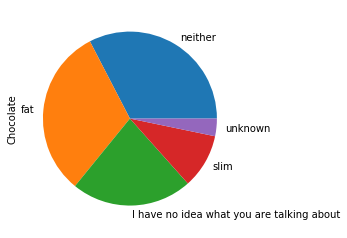

In [20]:
choco_responses = odi["Chocolate"].value_counts()
choco_responses.plot.pie()

plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')

In [ ]:
# percentile list 
# import re
perc =[.20, .40, .60, .80] 
odi["Stress_Level"].describe(percentiles = perc)

In [ ]:
odi.plot(kind='scatter',x='Bedtime',y='Stress_Level',color='red')
plt.show()

### Grouping by Gender

In [21]:
male_choco = odi[odi.Gender=='male'].Chocolate.value_counts()

In [22]:
female_choco = odi[odi.Gender=='female'].Chocolate.value_counts()

In [23]:
unknown_choco = odi[odi.Gender=='unknown'].Chocolate.value_counts()
unknown_choco

neither                                      5
I have no idea what you are talking about    3
slim                                         2
fat                                          2
unknown                                      1
Name: Chocolate, dtype: int64

<class 'pandas.core.frame.DataFrame'>


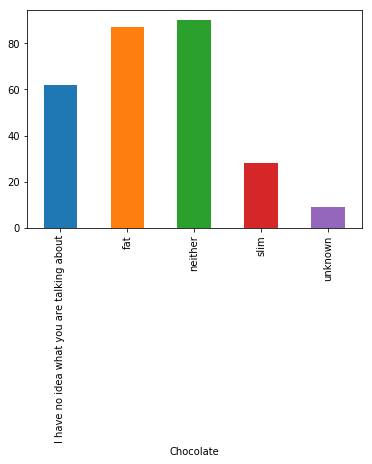

In [28]:
choco_gender_df = odi[['Chocolate', 'Gender']]
print(type(choco_gender_df))
choco_gender_df.groupby('Chocolate').Gender.count().plot.bar()
# grouped_choco_gender_df = choco_gender_df.groupby('Gender').Chocolate.value_counts()
# print(type(grouped_choco_gender_df))
# grouped_choco_gender_df.plot.bar()

In [ ]:
# pivot df from above', 
pivot_choco_gender = grouped_choco_gender_df.pivot(choco_gender_df, values = '', columns = 'Gender', index = 'Chocolate')

In [ ]:
choco_gender_frames = [male_choco, female_choco, unknown_choco]
result = pd.combine(choco_gender_frames)
result

In [ ]:
gender = odi[['Programme', 'Gender']]

In [ ]:
gender.head()

In [ ]:
gender.groupby(['Gender', 'Programme']).sum()